## Quantus: built-in XAI methods overview.
There are no XAI libraries focusing on NLP models, so we provide a range of popular XAI methods built-in in Quantus.
Some of them are just wrappers around 3-rd party libraries (e.g., LIME, SHAP, NoiseGrad).
They-re compatible with Torch and tensorflow models from Huggingface Hub out of the box.
In order to use them with your own model, you have to implement `TensorflowTextClassifier` or `TorchTextClassifier` respectively.

In [9]:
import quantus.nlp as qn
from tqdm.auto import tqdm
from quantus.nlp.helpers.utils import map_explanations

#### 1. Create model, generate predictions.

In [2]:
model = qn.TorchHuggingFaceTextClassifier.from_pretrained("gchhablani/bert-base-cased-finetuned-sst2")

In [3]:
x_batch = ["director rob marshall went out gunning to make a great one ."]
y_batch = model.predict(x_batch).argmax(axis=-1)
model.internal_model.config.id2label[y_batch[0]]

'positive'

#### 2. Generate explanations
All available XAI methods can be listed with `quantus.nlp.available_xai_methods()`

In [4]:
xai_methods = qn.available_xai_methods()
xai_methods.sort()
xai_methods

['GradNorm',
 'GradXInput',
 'IntGrad',
 'LIME',
 'NoiseGrad',
 'NoiseGrad++',
 'SHAP']

The main "entrypoint" for using built-in XAI methods is `quantus.nlp.explain`

In [5]:
a_batch = []
pbar = tqdm(xai_methods)
for i in pbar:
    pbar.desc = i
    a = qn.explain(model, x_batch, y_batch, method=i)
    a_batch.append(a[0])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/7 [00:00<?, ?it/s]

NoiseGrad:   0%|          | 0/10 [00:00<?, ?it/s]

NoiseGrad++:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
a_batch = map_explanations(a_batch, qn.normalize_sum_to_1)

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


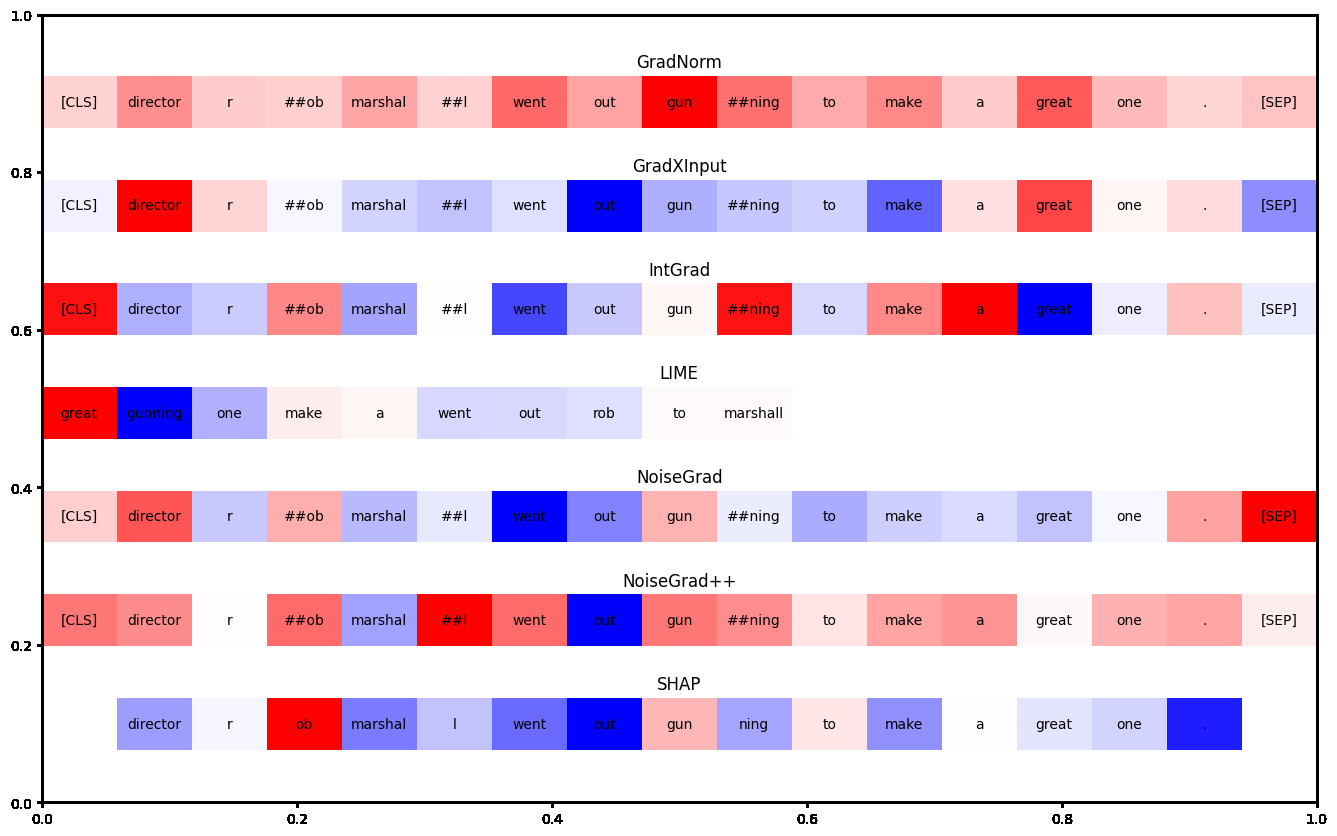

In [11]:
qn.visualise_explanations_as_pyplot(a_batch, xai_methods)

Most of the XAI methods can be called as well with plain-text inputs, as well as directly with token embeddings.
In practise this means, that for robustness metrics they can be used in combination with plain-text perturbation functions (e.g., typo_replacement)
and numerical ones (e.g., gaussian_noise). To verify which XAI methods support passing token embeddings we can see output of `quantus.nlp.available_numerical_xai_methods()`

In [7]:
qn.available_numerical_xai_methods()

['GradNorm', 'GradXInput', 'IntGrad', 'NoiseGrad', 'NoiseGrad++']